    populacao     lucro
0      6.1101  17.59200
1      5.5277   9.13020
2      8.5186  13.66200
3      7.0032  11.85400
4      5.8598   6.82330
5      8.3829  11.88600
6      7.4764   4.34830
7      8.5781  12.00000
8      6.4862   6.59870
9      5.0546   3.81660
10     5.7107   3.25220
11    14.1640  15.50500
12     5.7340   3.15510
13     8.4084   7.22580
14     5.6407   0.71618
15     5.3794   3.51290
16     6.3654   5.30480
17     5.1301   0.56077
18     6.4296   3.65180
19     7.0708   5.38930
20     6.1891   3.13860
21    20.2700  21.76700
22     5.4901   4.26300
23     6.3261   5.18750
24     5.5649   3.08250
25    18.9450  22.63800
26    12.8280  13.50100
27    10.9570   7.04670
28    13.1760  14.69200
29    22.2030  24.14700
..        ...       ...
67    10.2360   7.77540
68     5.4994   1.01730
69    20.3410  20.99200
70    10.1360   6.67990
71     7.3345   4.02590
72     6.0062   1.27840
73     7.2259   3.34110
74     5.0269  -2.68070
75     6.5479   0.29678
76     7.5386   

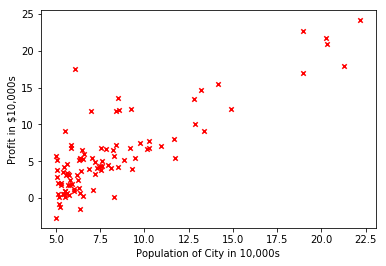

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Carregando os dados
dados = pd.read_csv('C:\\Users\\Flavio\\Downloads\\ex1data1.txt', names = ['populacao', 'lucro'])
print (dados)

#gráfico de dispersão (scatter plot) dos dados
plt.clf()
dados.plot.scatter(x='populacao', y='lucro',color='Red',marker='x');
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.figure(figsize=(30,35))
plt.show()

In [3]:
"""
Atribuindo valores das variáveis para a função de custo
"""
## Separa as colunas 'populacao' e 'lucro' em X e y
X_df = pd.DataFrame(dados.populacao)
y_df = pd.DataFrame(dados.lucro)

## Numero de observacoes dos dados
m = len(y_df)

In [4]:
"""
Declarações de parâmetros
alpha: taxa de aprendizado
it:iterações (quantas vezes realiza atualização)
"""

it = 1500
alpha = 0.01

In [45]:
"""
As duas operações a seguir são para, primeiro, transformar a estrutura dos dados em uma matriz
para simplificar as operações e, em seguida, calcular a função de custo. 
(np.dot é usado para multiplicação de matrizes)
"""

## Adiciona uma coluna só com "1". Isso vai ser a segunda coluna quando for feita a interceptação com X.
X_df['intercept'] = 1
print (X_df) #para conferir


    populacao  intercept
0      6.1101          1
1      5.5277          1
2      8.5186          1
3      7.0032          1
4      5.8598          1
5      8.3829          1
6      7.4764          1
7      8.5781          1
8      6.4862          1
9      5.0546          1
10     5.7107          1
11    14.1640          1
12     5.7340          1
13     8.4084          1
14     5.6407          1
15     5.3794          1
16     6.3654          1
17     5.1301          1
18     6.4296          1
19     7.0708          1
20     6.1891          1
21    20.2700          1
22     5.4901          1
23     6.3261          1
24     5.5649          1
25    18.9450          1
26    12.8280          1
27    10.9570          1
28    13.1760          1
29    22.2030          1
..        ...        ...
67    10.2360          1
68     5.4994          1
69    20.3410          1
70    10.1360          1
71     7.3345          1
72     6.0062          1
73     7.2259          1
74     5.0269          1


In [46]:

## Transforma em vetores do Numpy para facilitar operações com matrizes
## Inicia com theta em 0, 0
X = np.array(X_df)
y = np.array(y_df).flatten()
theta = np.array([0, 0])

In [47]:
def computarCusto(X, y, theta):

    """
    computarCusto(X, y, theta) calcula o custo usando theta como 
    parametro da regressão linear para ajustar os pontos em X e y
    m -- quantidade de itens do conjunto de treinamento
    J -- função de custo
    theta -- Gradiente Descendente
    """
    ## quantidade de itens do conjunto de treinamento
    m = len(y)

    ## Calcula o custo com os parãmetros fornecidos
    J = np.sum((X.dot(theta)-y)**2)/2/m

    return J

In [48]:
"""
"Após implementar essa função, você pode verificar a cor-
retude executando com todos os parâmetros iguais a zero. Nessa situação, sua
função deve gerar um valor igual a 32,07."
"""

#computarCusto(X, y, theta)
#print (computarCusto(X, y, theta))
#print(theta)
result = (computarCusto(X, y, theta))
#print ("Com todos os parâmetros iguais a %s, a função gera um valor igual a %f." % (theta,result))
print ("Com todos os parâmetros iguais a zero, a função gera um valor igual a %.2f." % result)

Com todos os parâmetros iguais a zero, a função gera um valor igual a 32.07.


In [49]:
def gduni(X, y, theta, alpha, it):
    """
    gduni Executa o algoritmo Gradiente Descendente para ajustar theta
    theta = GRADIENTDESENT(X, y, theta, alpha, num_iters) atualiza o valor de theta  
    em passos, definido pelo número de iterações (it), com taxa de aprendizado alpha
    
    
    
    """
    cost_history = [0] * it
    
    for iteration in range(it):
        hipotese = X.dot(theta)
        perda = hipotese-y
        gradiente = X.T.dot(perda)/m
        theta = theta - alpha*gradiente
        custo = computarCusto(X, y, theta)
        cost_history[iteration] = custo

    return theta, cost_history

In [50]:
(t, c) = gduni(X,y,theta,0.01, 1500)
best_fit_x = np.linspace(0, 25, 20)
best_fit_y = [t[1] + t[0]*xx for xx in best_fit_x]

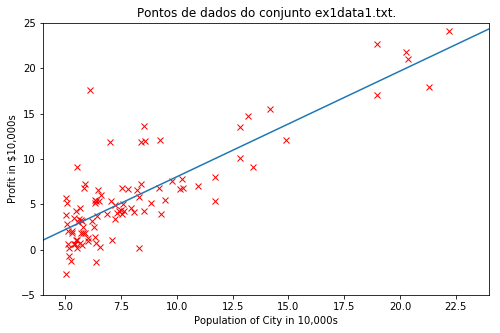

In [55]:
plt.clf()
plt.figure(figsize=(8,5))
plt.plot(X_df.populacao, y_df, '.',color='Red',marker='x')
plt.plot(best_fit_x, best_fit_y, '-')
plt.axis([4,24,-5,25])
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Pontos de dados do conjunto ex1data1.txt.')
plt.show()

In [54]:
"""
"Usar o modelo de regressão linear produzido pelo seu código para predizer o lucro em regiões com
populações de 35.000 e 70.000 habitantes. 
"""

print ("Lucro em regiões com populações de 35.000 habitantes = $ %.2f" % (10000.0*(np.array([3.5, 1]).dot(t))))
print ("Lucro em regiões com populações de 70.000 habitantes = $ %.2f" % (10000.0*(np.array([7, 1]).dot(t))))

Lucro em regiões com populações de 35.000 habitantes = $ 4519.77
Lucro em regiões com populações de 70.000 habitantes = $ 45342.45
